In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical

import random
     
from keras.layers import Dropout
from keras.layers import Flatten

from tensorflow.keras.layers import Conv2D
#from keras.layers.convolutional import Conv2D

from tensorflow.keras.layers import MaxPooling2D
#from keras.layers.convolutional import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

#from google.colab import drive
import glob

In [3]:
file_path = 'Desktop/proyecto integrador/*'

In [4]:
noise = glob.glob("OK_etiquetadas_500-2/*.png")

nonoise = glob.glob("NOK_etiquetadas_500-2/*.png")

In [5]:
len(noise)

500

In [6]:
len(nonoise)

500

In [7]:
noise_Formated = []
nonoise_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in noise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [8]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [9]:
X = np.vstack((noise_Formated,nonoise_Formated))
X.shape

(1000, 250, 400)

In [10]:
y = np.hstack((y_noise,y_nonoise))
y.shape

(1000,)

In [11]:
X=X/255

In [12]:
# 400 x 250 = 100,000
num_pixels = 100000
X = X.reshape(X.shape[0], num_pixels)
print(X.shape)

(1000, 100000)


In [13]:
model = Sequential()
model.add(Dense(units = 50, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │     5,000,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,000,670 (19.08 MB)

 Trainable params: 5,000,670 (19.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
print(X.shape)
print(y.shape)
print(y)

(1000, 100000)
(1000,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [27]:
model = Sequential()
model.add(Dense(units=1, input_dim=100000, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',  metrics=['accuracy', 'precision', 'recall'])

In [28]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=32, epochs=100, 
                 validation_data=(X_test, y_test), shuffle='true')

Epoch 1/100
24/24 - 2s - 92ms/step - accuracy: 0.5427 - loss: 0.6911 - precision: 0.7465 - recall: 0.1402 - val_accuracy: 0.5160 - val_loss: 0.6896 - val_precision: 1.0000 - val_recall: 0.0082
Epoch 2/100
24/24 - 0s - 13ms/step - accuracy: 0.4960 - loss: 0.6870 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5120 - val_loss: 0.6867 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
24/24 - 0s - 15ms/step - accuracy: 0.4987 - loss: 0.6834 - precision: 1.0000 - recall: 0.0053 - val_accuracy: 0.5240 - val_loss: 0.6842 - val_precision: 1.0000 - val_recall: 0.0246
Epoch 4/100
24/24 - 0s - 11ms/step - accuracy: 0.5093 - loss: 0.6801 - precision: 1.0000 - recall: 0.0265 - val_accuracy: 0.5240 - val_loss: 0.6819 - val_precision: 1.0000 - val_recall: 0.0246
Epoch 5/100
24/24 - 0s - 12ms/step - accuracy: 0.5147 - loss: 0.6772 - precision: 0.8500 - recall: 0.0450 - val_accuracy: 0.5440 - val_loss: 0.6798 - val_precision: 0.8333 - val_recall: 0.0820
Epoch 6/100
24/24 -

In [29]:
# resumen del model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │       100,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,005 (1.14 MB)

 Trainable params: 100,001 (390.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 200,004 (781.27 KB)

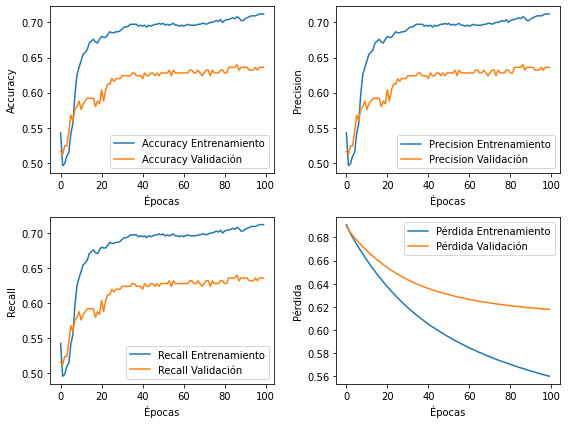

In [36]:
# Obtén los datos del historial
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

precision = hist.history['precision']
val_precision = hist.history['val_precision']

recall = hist.history['recall']
val_recall = hist.history['val_recall']

loss = hist.history['loss']
val_loss = hist.history['val_loss']


# Crea la figura y los subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(val_accuracy, label='Accuracy Validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de precision
ax2.plot(accuracy, label='Precision Entrenamiento')
ax2.plot(val_accuracy, label='Precision Validación')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precision')
ax2.legend()

# Gráfica de recall
ax3.plot(accuracy, label='Recall Entrenamiento')
ax3.plot(val_accuracy, label='Recall Validación')
ax3.set_xlabel('Épocas')
ax3.set_ylabel('Recall')
ax3.legend()

# Gráfica de pérdida
ax4.plot(loss, label='Pérdida Entrenamiento')
ax4.plot(val_loss, label='Pérdida Validación')
ax4.set_xlabel('Épocas')
ax4.set_ylabel('Pérdida')
ax4.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()